# 2018 Spring Data Analytics @Dept. of Industrial engineering
## Text mining
### Contents
 - TF
 - Document similarity
 - Bigram TF
 - TF-IDF
 - Generalized VSM
 - Network drawing
 - Regex
 - RAKE
 - KoNLPy
 - IBM Watson NLU  

### Used library
 - Sci-kit learn: Machine learning을 Python에서 손쉽게 이용할 수 있도록 작성된 라이브러리, 전처리/모형구축/평가 등 전 과정에 관련한 모듈등이 구축되어 있음 (http://scikit-learn.org)
 - Matplotlib: Python에서 Plot을 그릴때 가징 기본적인 라이브러리, 본 예제에서는 PCA등을 이용하여 차원축소된 데이터를 시각화 하는데 사용 (https://matplotlib.org/)
 - NetworkX: Python에서 네트워크관련 다양한 연산을 할때 사용하는 패키지, 중심성등을 계산할 수 있지만 본 예제에서는 네트워크 드로잉을 위해 사용 (https://networkx.github.io/)
 - KoNLPy: 한국어 자연어처리를 위한 도구들을 통합해놓은 Wrapper (http://konlpy.org/)
 - re: 정규식 처리를 위한 Python 내부 패키지 (https://docs.python.org/3/library/re.html)
 - watson_developer_cloud: IBM Watson의 다양한 도구들을 사용하기 위해 IBM에서 제공하는 패키지 (https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/)
 - Python-rake: 키워드 추출 알고리즘(RAKE) 가 구현되어있는 패키지 (https://github.com/fabianvf/python-rake)

### Sample data

In [1]:
corpus = """수도권에서 시행됐던 미세먼지 비상저감조치가 전국으로 확대되고, 저감조치에 참여하는 민간사업장이 늘어난다.
정부는 마스크를 무상 보급하는 방안을 검토하기로 했지만, 학교 휴업과 관련해선 현행 지침을 당분간 유지하기로 했다.
또한 2020년까지 미세먼지 배출량을 30% 줄인다는 기존 목표 외에 5~10% 추가 감축 방안을 발굴해 오는 9월 발표하기로 했다.
정부는 29일 오전 서울청사에서 이낙연 국무총리 주재로 국정현안점검회의를 열고 '봄철 미세먼지 대책 보완사항' 안건에 대해 논의했다.
김은경 환경부 장관은 "최근 고농도 미세먼지로 인해 국민들에게 심려를 끼쳐 드려 송구스럽게 생각한다"면서 "고농도 미세먼지 발생 시 가용한 모든 수단을 동원해 나가고, 국내 미세먼지 발생량 감축대책을 차질없이 진행하겠다"고 밝혔다.
먼저 정부는 공공부문에 한정된 비상저감조치로는 효과가 미미하다는 지적에 따라 서울ㆍ경기ㆍ인천 소재 39개 민간업체를 저감조치에 참여토록 했다.
비상저감조치가 발령되면 이들 업체는 살수차를 추가 가동하거나 황과 재 함량이 낮은 연료로 교체하는 방법으로 대기오염물질 배출량을 최소화 하게 된다.
향후 굴뚝자동측정장비가 구축된 193개 수도권 대형사업장으로 저감조치 참여 대상 업체를 확대할 계획이다.
그간 비상저감조치는 수도권에서만 시행됐으나 앞으로는 전국으로 확대된다.
부산시는 이달부터 미세먼지 주의보 발령 시 관용차량 운행 감축, 소각장 운영 제한 등과 같은 조치를 시행한다.
광주는 다음달 16일부터 '매우나쁨' 시 공공기관 차량 2부제 등 저감조치를 실시할 예정이다.
또한 정부는 올해 노후석탄발전소 5기를 가동중지한 것과 별개로 미세먼지를 다량 배출하는 석탄발전소에 대해 감축 운영하는 방안을 검토하기로 했다.""".split('\n')
#http://v.media.daum.net/v/20180329104621588

### Term frequency (TF)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer()
TF = tf.fit_transform(corpus)
print(tf.get_feature_names())
print(TF.toarray()[0,:]) #toarray()

['10', '16일부터', '193개', '2020년까지', '29일', '2부제', '30', '39개', '5기를', '9월', '가동중지한', '가동하거나', '가용한', '감축', '감축대책을', '같은', '검토하기로', '것과', '계획이다', '고농도', '공공기관', '공공부문에', '관련해선', '관용차량', '광주는', '교체하는', '구축된', '국내', '국무총리', '국민들에게', '국정현안점검회의를', '굴뚝자동측정장비가', '그간', '기존', '김은경', '끼쳐', '나가고', '낮은', '노후석탄발전소', '논의했다', '늘어난다', '다량', '다음달', '당분간', '대기오염물질', '대상', '대책', '대해', '대형사업장으로', '동원해', '된다', '드려', '등과', '따라', '또한', '마스크를', '매우나쁨', '먼저', '면서', '모든', '목표', '무상', '미미하다는', '미세먼지', '미세먼지로', '미세먼지를', '민간사업장이', '민간업체를', '발굴해', '발령', '발령되면', '발생', '발생량', '발표하기로', '밝혔다', '방법으로', '방안을', '배출량을', '배출하는', '별개로', '보급하는', '보완사항', '봄철', '부산시는', '비상저감조치가', '비상저감조치는', '비상저감조치로는', '살수차를', '생각한다', '서울ㆍ경기ㆍ인천', '서울청사에서', '석탄발전소에', '소각장', '소재', '송구스럽게', '수단을', '수도권', '수도권에서', '수도권에서만', '시행됐던', '시행됐으나', '시행한다', '실시할', '심려를', '안건에', '앞으로는', '업체는', '업체를', '연료로', '열고', '예정이다', '오는', '오전', '올해', '외에', '운영', '운영하는', '운행', '유지하기로', '이낙연', '이달부터', '이들', '인해', '장관은', '저감조치', '저감조치를', '저감조치에', '전국으로', '정부는', '제한', '조치를',

### Document similarity

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

new_sentence = '고농도 미세먼지 수도권'
query = tf.transform([new_sentence]).toarray()
for index, vector in enumerate(TF.toarray()):
    sim=cosine_similarity(query, [vector])
    print("{index}\t{sim}".format(index=index, sim=sim))
print(corpus[4])

0	[[0.18257419]]
1	[[0.]]
2	[[0.13608276]]
3	[[0.14433757]]
4	[[0.40201513]]
5	[[0.]]
6	[[0.]]
7	[[0.16666667]]
8	[[0.]]
9	[[0.1490712]]
10	[[0.]]
11	[[0.]]
김은경 환경부 장관은 "최근 고농도 미세먼지로 인해 국민들에게 심려를 끼쳐 드려 송구스럽게 생각한다"면서 "고농도 미세먼지 발생 시 가용한 모든 수단을 동원해 나가고, 국내 미세먼지 발생량 감축대책을 차질없이 진행하겠다"고 밝혔다.


### Bigram-term frequency

In [4]:
bigram = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
BIGRAM = bigram.fit_transform(corpus)
print(BIGRAM[0,:])

  (0, 146)	1
  (0, 307)	1
  (0, 273)	1
  (0, 331)	1
  (0, 275)	1
  (0, 184)	1
  (0, 139)	1
  (0, 218)	1
  (0, 210)	1
  (0, 86)	1
  (0, 145)	1
  (0, 306)	1
  (0, 271)	1
  (0, 330)	1
  (0, 274)	1
  (0, 182)	1
  (0, 134)	1
  (0, 217)	1
  (0, 209)	1


### Term frequency-Inverse document frequency (TF-IDF)

In [5]:
from sklearn.feature_extraction.text import  TfidfTransformer

tfidf = TfidfTransformer()
TFIDF = tfidf.fit_transform(TF)
print(TFIDF[0,:])

  (0, 97)	0.3411178753984881
  (0, 99)	0.3411178753984881
  (0, 63)	0.21062271357593407
  (0, 84)	0.2929559938669056
  (0, 127)	0.2929559938669056
  (0, 153)	0.3411178753984881
  (0, 126)	0.2929559938669056
  (0, 141)	0.3411178753984881
  (0, 66)	0.3411178753984881
  (0, 40)	0.3411178753984881


### Generalized vector space model

In [6]:
#Cooccurence between words
co_words = TF.T*TF
#Cooccurence between docs
co_docs = TF*TF.T

### Network drawing

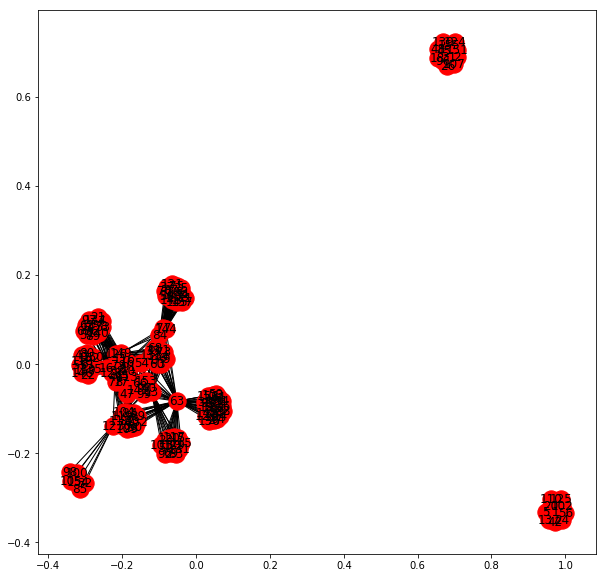

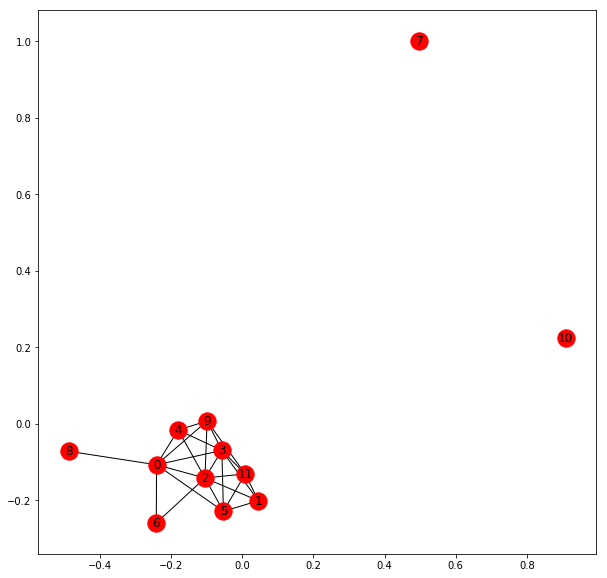

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G_w = nx.from_scipy_sparse_matrix(co_words)
plt.figure(figsize=(10,10)) 
nx.draw_networkx(G_w)

G_d = nx.from_scipy_sparse_matrix(co_docs)
plt.figure(figsize=(10,10)) 
nx.draw_networkx(G_d)

In [8]:
for index, text in enumerate(corpus):
    print('{index}\t{text}'.format(index=index, text=text))

0	수도권에서 시행됐던 미세먼지 비상저감조치가 전국으로 확대되고, 저감조치에 참여하는 민간사업장이 늘어난다.
1	정부는 마스크를 무상 보급하는 방안을 검토하기로 했지만, 학교 휴업과 관련해선 현행 지침을 당분간 유지하기로 했다.
2	또한 2020년까지 미세먼지 배출량을 30% 줄인다는 기존 목표 외에 5~10% 추가 감축 방안을 발굴해 오는 9월 발표하기로 했다.
3	정부는 29일 오전 서울청사에서 이낙연 국무총리 주재로 국정현안점검회의를 열고 '봄철 미세먼지 대책 보완사항' 안건에 대해 논의했다.
4	김은경 환경부 장관은 "최근 고농도 미세먼지로 인해 국민들에게 심려를 끼쳐 드려 송구스럽게 생각한다"면서 "고농도 미세먼지 발생 시 가용한 모든 수단을 동원해 나가고, 국내 미세먼지 발생량 감축대책을 차질없이 진행하겠다"고 밝혔다.
5	먼저 정부는 공공부문에 한정된 비상저감조치로는 효과가 미미하다는 지적에 따라 서울ㆍ경기ㆍ인천 소재 39개 민간업체를 저감조치에 참여토록 했다.
6	비상저감조치가 발령되면 이들 업체는 살수차를 추가 가동하거나 황과 재 함량이 낮은 연료로 교체하는 방법으로 대기오염물질 배출량을 최소화 하게 된다.
7	향후 굴뚝자동측정장비가 구축된 193개 수도권 대형사업장으로 저감조치 참여 대상 업체를 확대할 계획이다.
8	그간 비상저감조치는 수도권에서만 시행됐으나 앞으로는 전국으로 확대된다.
9	부산시는 이달부터 미세먼지 주의보 발령 시 관용차량 운행 감축, 소각장 운영 제한 등과 같은 조치를 시행한다.
10	광주는 다음달 16일부터 '매우나쁨' 시 공공기관 차량 2부제 등 저감조치를 실시할 예정이다.
11	또한 정부는 올해 노후석탄발전소 5기를 가동중지한 것과 별개로 미세먼지를 다량 배출하는 석탄발전소에 대해 감축 운영하는 방안을 검토하기로 했다.


### Regular expression (Regex)

In [9]:
import re

corpus[4]
result = re.sub("[^\s\da-zA-Z가-힣]","", corpus[4])
print(result)

김은경 환경부 장관은 최근 고농도 미세먼지로 인해 국민들에게 심려를 끼쳐 드려 송구스럽게 생각한다면서 고농도 미세먼지 발생 시 가용한 모든 수단을 동원해 나가고 국내 미세먼지 발생량 감축대책을 차질없이 진행하겠다고 밝혔다


### RAKE

In [23]:
text = """North Korea leader Kim Jong Un, accompanied by his wife Ri Sol Ju, clapped and waved Sunday as he attended a rare concert of South Korean singers and performers in Pyongyang.
After the two-hour plus concert, the North Korean leader and his wife shook hands with the pop stars, that included K-pop girl band Red Velvet, and took pictures with them, according to video and press pool reports.
The concert marked the first time in over a decade that South Korean musicians have traveled to North Korea, as relations between the two countries have thawed ahead of a groundbreaking summit of the leaders of the two countries planned for the end of April."""

import RAKE
Rake = RAKE.Rake(RAKE.SmartStopList())
Rake.run(text)

[('north korea leader kim jong', 20.833333333333336),
 ('wife ri sol ju', 15.5),
 ('north korean leader', 10.333333333333334),
 ('wife shook hands', 9.5),
 ('south korean singers', 9.0),
 ('press pool reports', 9.0),
 ('south korean musicians', 9.0),
 ('north korea', 6.833333333333334),
 ('waved sunday', 4.0),
 ('two-hour', 4.0),
 ('pop stars', 4.0),
 ('thawed ahead', 4.0),
 ('groundbreaking summit', 4.0),
 ('rare concert', 3.666666666666667),
 ('concert marked', 3.666666666666667),
 ('countries planned', 3.5),
 ('concert', 1.6666666666666667),
 ('countries', 1.5),
 ('accompanied', 1.0),
 ('clapped', 1.0),
 ('attended', 1.0),
 ('performers', 1.0),
 ('pyongyang', 1.0),
 ('pictures', 1.0),
 ('video', 1.0),
 ('time', 1.0),
 ('decade', 1.0),
 ('traveled', 1.0),
 ('relations', 1.0),
 ('leaders', 1.0),
 ('end', 1.0),
 ('april', 1.0)]

### KoNLPy

In [10]:
from konlpy.tag import Hannanum; engine = Hannanum()

print('-'*20 + '원문' + '-'*20)
print(corpus[0])
print('-'*20 + '형태소 분석' + '-'*20)
print(engine.morphs(corpus[0]))
print('-'*20 + '명사 추출' + '-'*20)
print(engine.nouns(corpus[0]))
print('-'*20 + 'POS tagging' + '-'*20)
print(engine.pos(corpus[0])) 

--------------------원문--------------------
수도권에서 시행됐던 미세먼지 비상저감조치가 전국으로 확대되고, 저감조치에 참여하는 민간사업장이 늘어난다.
--------------------형태소 분석--------------------
['수도권', '에서', '시행', '되', '었던', '미세먼지', '비상저감조치', '가', '전국', '으로', '확대', '되', '고', ',', '저감조치', '에', '참여', '하', '는', '민간사업장', '이', '늘', '어', '나', 'ㄴ다', '.']
--------------------명사 추출--------------------
['수도권', '시행', '미세먼지', '비상저감조치', '전국', '확대', '저감조치', '참여', '민간사업장']
--------------------POS tagging--------------------
[('수도권', 'N'), ('에서', 'J'), ('시행', 'N'), ('되', 'X'), ('었던', 'E'), ('미세먼지', 'N'), ('비상저감조치', 'N'), ('가', 'J'), ('전국', 'N'), ('으로', 'J'), ('확대', 'N'), ('되', 'X'), ('고', 'E'), (',', 'S'), ('저감조치', 'N'), ('에', 'J'), ('참여', 'N'), ('하', 'X'), ('는', 'E'), ('민간사업장', 'N'), ('이', 'J'), ('늘', 'P'), ('어', 'E'), ('나', 'P'), ('ㄴ다', 'E'), ('.', 'S')]


### IBM Watson Natural language understanding

In [11]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, KeywordsOptions
import json

nlu_unit = NaturalLanguageUnderstandingV1(url='https://gateway.watsonplatform.net/natural-language-understanding/api', 
                                          username=Your username, 
                                          password=Your password,
                                          version='2017-02-27')
features = Features(keywords=KeywordsOptions(emotion=False, sentiment=True, limit=100))
response = nlu_unit.analyze(features=features, language='ko', text=corpus[1])
response_json = json.loads(json.dumps(response, indent=2))
print(response_json)

{'usage': {'text_units': 1, 'text_characters': 64, 'features': 1}, 'language': 'ko', 'keywords': [{'text': '정부', 'sentiment': {'score': 0.0, 'label': 'neutral'}, 'relevance': 0.951}, {'text': '마스크', 'sentiment': {'score': 0.0, 'label': 'neutral'}, 'relevance': 0.926}, {'text': '방안', 'sentiment': {'score': 0.0, 'label': 'neutral'}, 'relevance': 0.904}, {'text': '학교 휴업', 'sentiment': {'score': 0.0, 'label': 'neutral'}, 'relevance': 0.884}, {'text': '현행 지침', 'sentiment': {'score': 0.0, 'label': 'neutral'}, 'relevance': 0.867}]}
